### 1. Import Libraries

In [63]:
# Import necessary libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [64]:
data_seq = '1'

### 2. Define Constants and Directories


In [65]:
# Define gestures and directories
GESTURES = ['swipe', 'push-pull', 'circular']
input_dir = '../data/raw/'+ data_seq+'/' # Directory containing the raw JSON files
output_dir = '../data/processed/'+ data_seq+'/'  # Directory to save processed data

### 3. Function to Load JSON Files
This function reads each JSON file and creates a DataFrame with timestamp as the index and rssi values.

In [66]:
def read_rssi_json(file_path):
    """
    Reads a JSON file and returns a DataFrame with timestamp and RSSI values.
    """
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    records = []
    for entry in data:
        timestamp = datetime.strptime(entry['timestamp'], '%Y-%m-%d %H:%M:%S.%f')
        records.append({'timestamp': timestamp, 'rssi': entry['rssi']})
    
    df = pd.DataFrame(records)
    df.set_index('timestamp', inplace=True)
    return df

# Test Count

In [67]:
input_dir1 = '../data/raw/'+ data_seq+'/'+'swipe_rssi.json'
input_dir2 = '../data/raw/'+ data_seq+'/'+'push-pull_rssi.json'
input_dir3 = '../data/raw/'+ data_seq+'/'+'circular_rssi.json'

df1 = read_rssi_json(input_dir1)
df2 = read_rssi_json(input_dir2)
df3 = read_rssi_json(input_dir3)

print("Swipe Count" , df1.count())
print("Push-Pull Count", df2.count())
print("Circular Count",df3.count())

Swipe Count rssi    2271
dtype: int64
Push-Pull Count rssi    1532
dtype: int64
Circular Count rssi    1542
dtype: int64


### 4. Exploratory Data Analysis (EDA) Function
This function performs basic EDA by plotting time series and histogram of RSSI values for each gesture.



In [68]:


def perform_eda1(df, gesture):
    """
    Performs EDA for the RSSI data, including:
    1. RSSI time series plot
    2. RSSI histogram
    """
    print(f"Performing EDA for {gesture} gesture.")
    print(df.describe())  # Summary statistics

    # ------------------- Plot 1: RSSI Time Series -------------------
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['rssi'], label=f'{gesture.capitalize()} RSSI', color='teal', linewidth=2.0)

    plt.title(f'{gesture.capitalize()} Gesture - Raw RSSI Over Time', fontsize=14, fontweight='semibold')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('RSSI Value', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10, loc='upper right', frameon=True, shadow=True)
    plt.tight_layout()
    plt.show()

    # ------------------- Plot 2: RSSI Histogram -------------------
    plt.figure(figsize=(8, 5))
    sns.histplot(df['rssi'], bins=30, kde=True, color='mediumseagreen', edgecolor='black', linewidth=1.2)
    plt.title(f'{gesture.capitalize()} Gesture - RSSI Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('RSSI', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


def perform_eda2(df, gesture):
    """
    Performs EDA for the RSSI data, including:
    1. RSSI scatter plot with trendline
    2. RSSI histogram
    """
    print(f"Performing EDA for {gesture} gesture.")
    print(df.describe())  # Summary statistics

    # ------------------- Plot 1: RSSI Scatter Plot with Trendline -------------------
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df.index, y=df['rssi'], color='blue', alpha=0.6, label='RSSI Values')
    sns.regplot(x=np.arange(len(df)), y=df['rssi'], scatter=False, color='red', label='Trendline')

    plt.title(f'{gesture.capitalize()} Gesture - RSSI Over Time', fontsize=14, fontweight='medium')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('RSSI Value', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10, loc='upper right', frameon=True, shadow=True)
    plt.tight_layout()
    plt.show()

    # ------------------- Plot 2: RSSI Histogram -------------------
    plt.figure(figsize=(8, 5))
    sns.histplot(df['rssi'], bins=30, kde=True, color='mediumseagreen', edgecolor='black', linewidth=1.2, alpha=0.9)
    plt.title(f'{gesture.capitalize()} Gesture - RSSI Distribution', fontsize=14, fontweight='medium')
    plt.xlabel('RSSI', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


def perform_eda(df, gesture):
    """
    Performs EDA for the RSSI data, including:
    1. RSSI time series line plot
    2. RSSI histogram
    """
    print(f"Performing EDA for {gesture} gesture.")
    print(df.describe())  # Summary statistics

    # ------------------- Plot 1: RSSI Time Series Line Plot -------------------
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['rssi'], label=f'{gesture.capitalize()} RSSI', color='royalblue', linewidth=2.0)
    plt.fill_between(df.index, df['rssi'], alpha=0.1, color='royalblue')  # Add subtle shading under the curve

    plt.title(f'{gesture.capitalize()} Gesture - RSSI Over Time', fontsize=14, fontweight='medium')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('RSSI Value', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10, loc='upper right', frameon=True, shadow=True)
    plt.tight_layout()
    plt.show()

    # ------------------- Plot 2: RSSI Histogram -------------------
    plt.figure(figsize=(8, 5))
    sns.histplot(df['rssi'], bins=30, kde=True, color='mediumseagreen', edgecolor='black', linewidth=1.2, alpha=0.9)
    plt.title(f'{gesture.capitalize()} Gesture - RSSI Distribution', fontsize=14, fontweight='medium')
    plt.xlabel('RSSI', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show


### 5. Preprocess Function for Resampling, Smoothing, and Interpolation
This function resamples the RSSI data, applies a moving average for smoothing, and interpolates missing values.

In [69]:
# def preprocess_rssi_data(df, resample_interval='10ms'):
#     """
#     Resamples, smooths, and interpolates the RSSI data.
#     """
#     # Resample to regular interval
#     df_resampled = df.resample(resample_interval).mean()
    
#     # Smooth the data using a 3-point moving average
#     df_resampled['rssi'] = df_resampled['rssi'].rolling(window=3, min_periods=1).mean()
    
#     # Interpolate to fill any remaining missing values
#     df_resampled['rssi'] = df_resampled['rssi'].interpolate()
    
#     return df_resampled

def preprocess_rssi_data(df, min_count):
    """
    Processes the RSSI data by ignoring timestamp gaps, smoothing,
    and downsampling to the specified minimum count.
    """
    # Reset index to ignore timestamps and treat data as a continuous sequence
    df = df.reset_index(drop=True)

    # Smooth the data using a 3-point moving average
    df['rssi'] = df['rssi'].rolling(window=3, min_periods=1).mean()

    # Downsample to the minimum count without shuffling to maintain sequence order
    if len(df) > min_count:
        df = df.iloc[:min_count]
    else:
        # If the current count is less than min_count, consider padding with NaNs or handling accordingly
        padding_needed = min_count - len(df)
        padding = pd.DataFrame({'rssi': [np.nan] * padding_needed})
        df = pd.concat([df, padding], ignore_index=True)

    return df

 Test resampled Count

In [70]:
df_swipe = df1
df_push_pull =df2
df_circular = df3

min_count = min(len(df_swipe), len(df_push_pull), len(df_circular))

# Preprocess each DataFrame
df_swipe_processed = preprocess_rssi_data(df_swipe, min_count)
df_push_pull_processed = preprocess_rssi_data(df_push_pull, min_count)
df_circular_processed = preprocess_rssi_data(df_circular, min_count)

print("Swipe Count" , df_swipe_processed.count())
print("Push-Pull Count", df_push_pull_processed.count())
print("Circular Count",df_circular_processed.count())

Swipe Count rssi    1532
dtype: int64
Push-Pull Count rssi    1532
dtype: int64
Circular Count rssi    1532
dtype: int64


#### Plot Line Chart

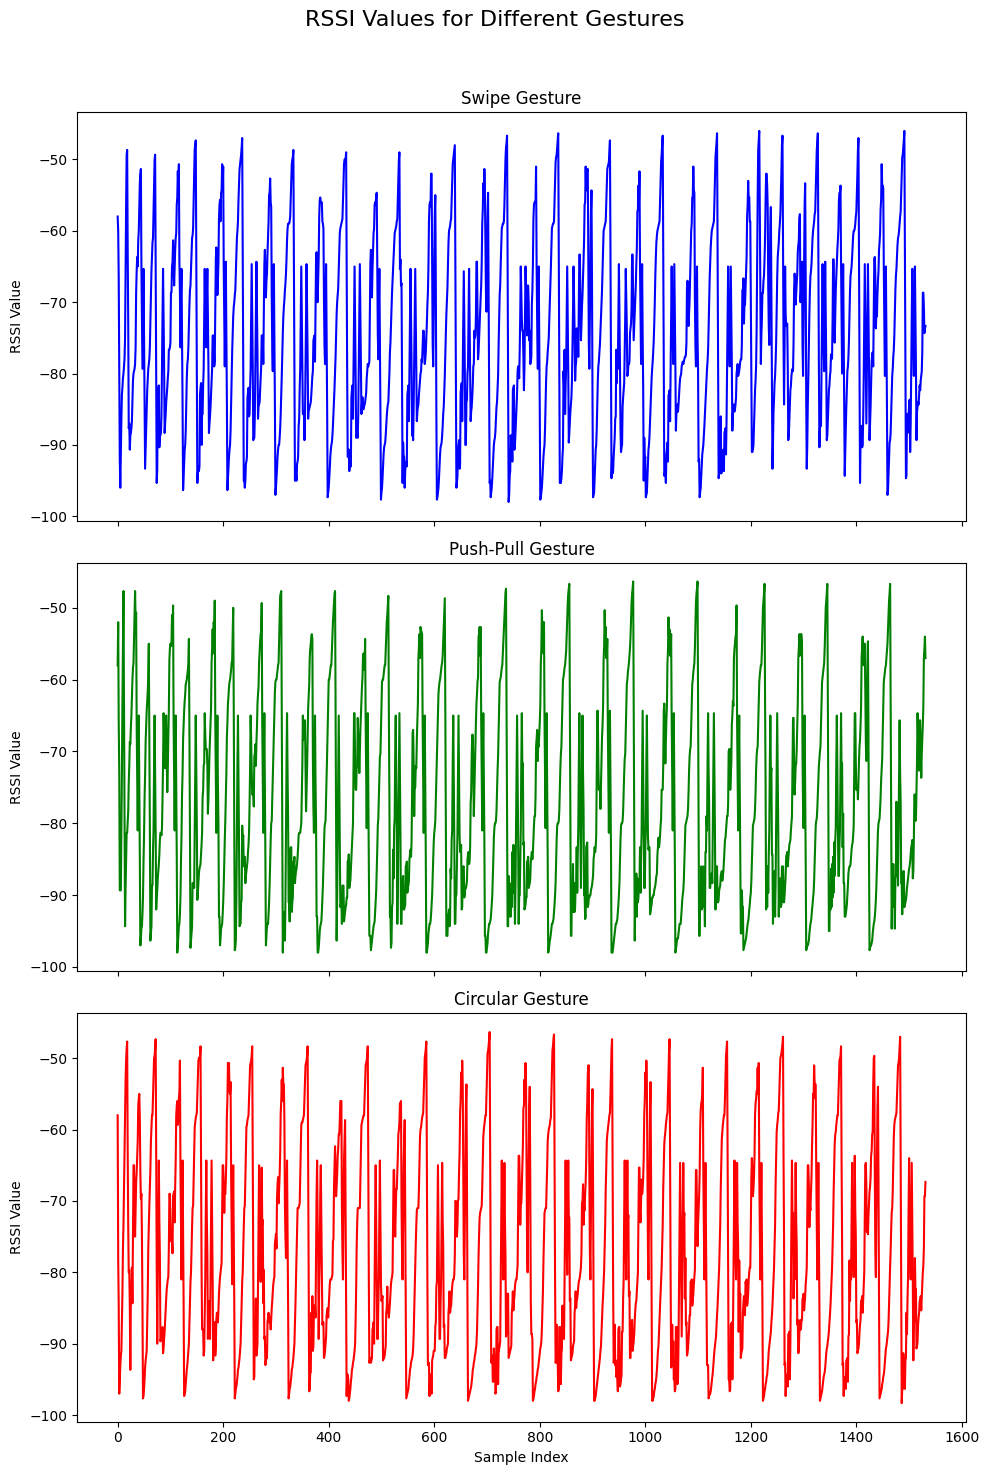

In [71]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Plot RSSI values for each gesture on separate subplots
axs[0].plot(df_swipe_processed['rssi'], color='blue')
axs[0].set_title('Swipe Gesture')
axs[0].set_ylabel('RSSI Value')

axs[1].plot(df_push_pull_processed['rssi'], color='green')
axs[1].set_title('Push-Pull Gesture')
axs[1].set_ylabel('RSSI Value')

axs[2].plot(df_circular_processed['rssi'], color='red')
axs[2].set_title('Circular Gesture')
axs[2].set_xlabel('Sample Index')
axs[2].set_ylabel('RSSI Value')

# Add a main title for the entire figure
fig.suptitle('RSSI Values for Different Gestures', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plots
plt.show()

### 6. Windowing Function for Sequence Creation
This function creates fixed-size windows from the processed data for model training.

In [72]:
# def create_sequences(df, window_size='1s', step_size='0.5s'):
#     """
#     Creates fixed-size sequences (windows) of the data for model training.
#     """
#     sequences = []
#     labels = []
    
#     # Define start and end times for sliding window
#     start_time = df.index.min()
#     end_time = df.index.max()
#     current_start = start_time
#     current_end = current_start + pd.Timedelta(window_size)

#     # Slide the window over the data
#     while current_end <= end_time:
#         window = df.loc[current_start:current_end]
#         if len(window) > 0:
#             sequences.append(window['rssi'].values)
        
#         # Shift the window by step_size
#         current_start += pd.Timedelta(step_size)
#         current_end = current_start + pd.Timedelta(window_size)
    
#     return np.array(sequences)

def create_sequences(df, window_size=100, step_size=50):
    """
    Creates fixed-size sequences (windows) of the data for model training.
    Operates on sample indices, ignoring timestamps.
    
    Parameters:
    - df: DataFrame containing the 'rssi' column.
    - window_size: Number of samples per window.
    - step_size: Number of samples to move the window at each step.
    
    Returns:
    - Numpy array of sequences.
    """
    sequences = []
    
    # Ensure the DataFrame index is reset to use integer-based indexing
    df = df.reset_index(drop=True)
    
    # Calculate the total number of samples
    total_samples = len(df)
    
    # Slide the window over the data
    for start_idx in range(0, total_samples - window_size + 1, step_size):
        end_idx = start_idx + window_size
        window = df.iloc[start_idx:end_idx]
        sequences.append(window['rssi'].values)
    
    return np.array(sequences)

### 7. Run EDA and Preprocessing on All Gesture Files
This section performs EDA, preprocessing, sequence creation, and saves the processed data in .npz format.

In [73]:
def preprocess_gesture_files(input_dir, output_dir, min_count=min_count, window_size=50, step_size=25):
    """
    Reads gesture files, performs EDA, preprocesses, creates sequences,
    and saves the data in .npz format.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    all_sequences = []
    all_labels = []

    for gesture in GESTURES:
        file_path = os.path.join(input_dir, f'{gesture}_rssi.json')
        
        # Step 1: Read the JSON file
        df = read_rssi_json(file_path)
        
        # Step 2: Perform EDA to analyze data patterns and noise
        #perform_eda(df, gesture)
        
        # Step 3: Resample, smooth, and interpolate
        df_preprocessed = preprocess_rssi_data(df, min_count)

        perform_eda(df_preprocessed,gesture)
        
        # Step 4: Create sequences from the preprocessed data
        sequences = create_sequences(df_preprocessed, window_size, step_size)
        
        # Step 5: Label each sequence according to gesture
        label = GESTURES.index(gesture)
        labels = np.full(len(sequences), label)
        
        # Append data
        all_sequences.append(sequences)
        all_labels.append(labels)
    
    # Combine sequences and labels across gestures
    all_sequences = np.concatenate(all_sequences, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

      # Print data count per label
    unique_labels, counts = np.unique(all_labels, return_counts=True)
    for u_label, count in zip(unique_labels, counts):
        print(f"Label {u_label} count: {count}")
    

    # Step 6: Save to .npz file
    np.savez_compressed(os.path.join(output_dir, 'gesture_data.npz'), data=all_sequences, labels=all_labels)
    print(f'Processed data saved to: {output_dir}/gesture_data.npz')


### 8. Run the Preprocessing Pipeline
Execute the preprocessing pipeline on all gesture files. Run this cell to preprocess the data and save it in .npz format.

Performing EDA for swipe gesture.
              rssi
count  1532.000000
mean    -74.006963
std      12.988786
min     -98.000000
25%     -84.333333
50%     -75.000000
75%     -64.333333
max     -46.000000


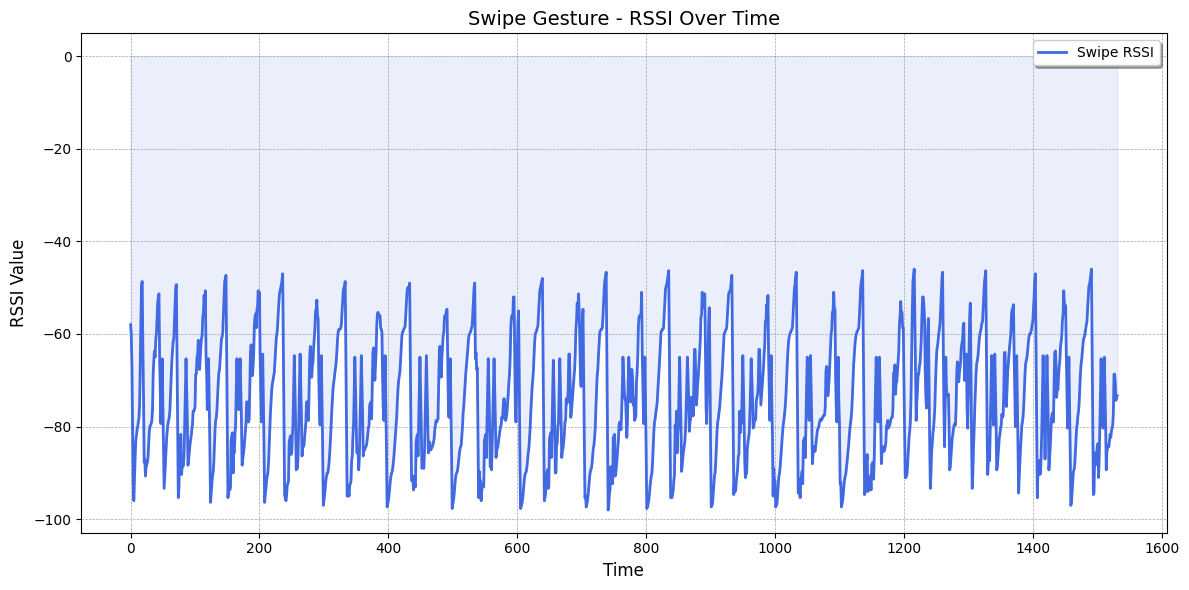

Performing EDA for push-pull gesture.
              rssi
count  1532.000000
mean    -76.986728
std      13.699905
min     -98.000000
25%     -88.666667
50%     -80.000000
75%     -65.666667
max     -46.333333


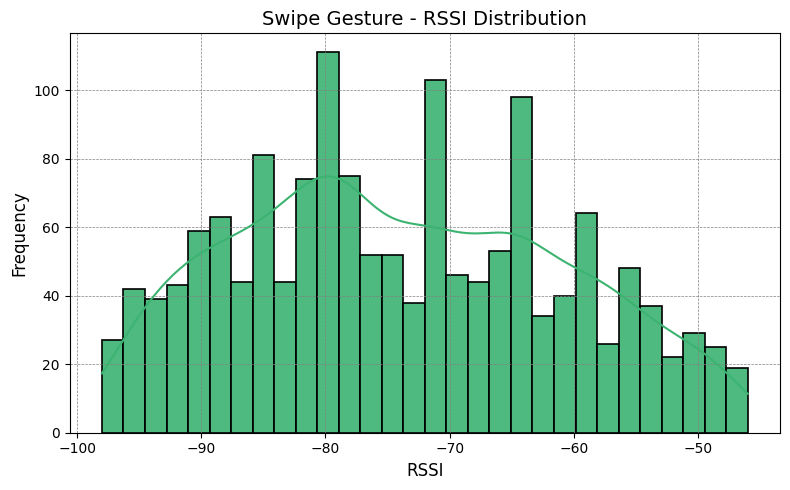

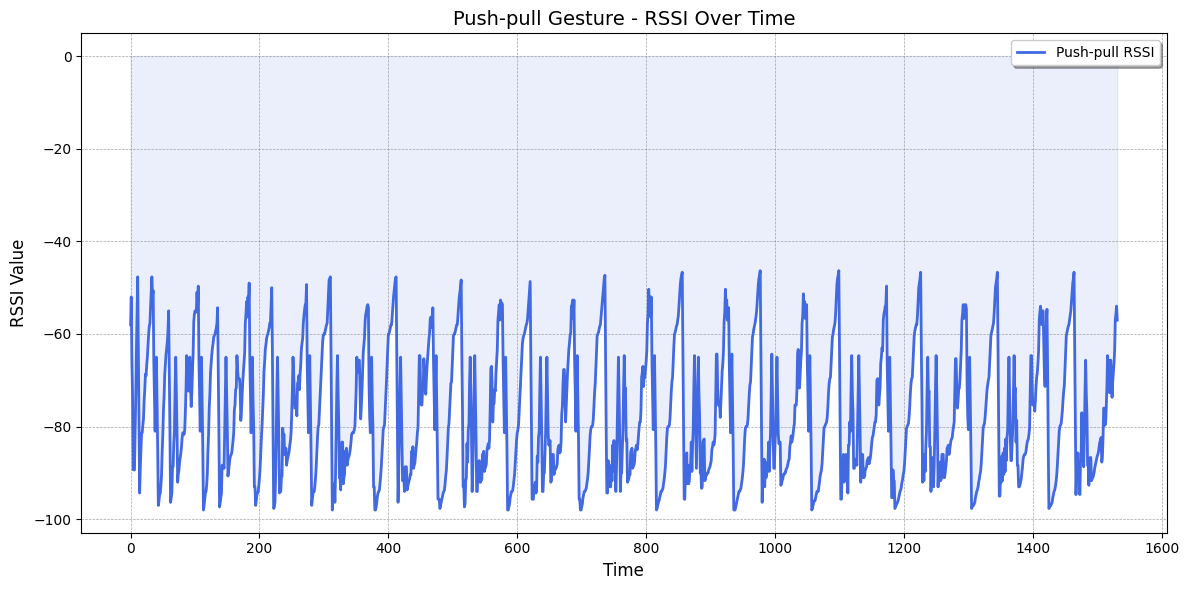

Performing EDA for circular gesture.
              rssi
count  1532.000000
mean    -77.145561
std      14.069351
min     -98.333333
25%     -89.333333
50%     -80.666667
75%     -65.666667
max     -46.333333


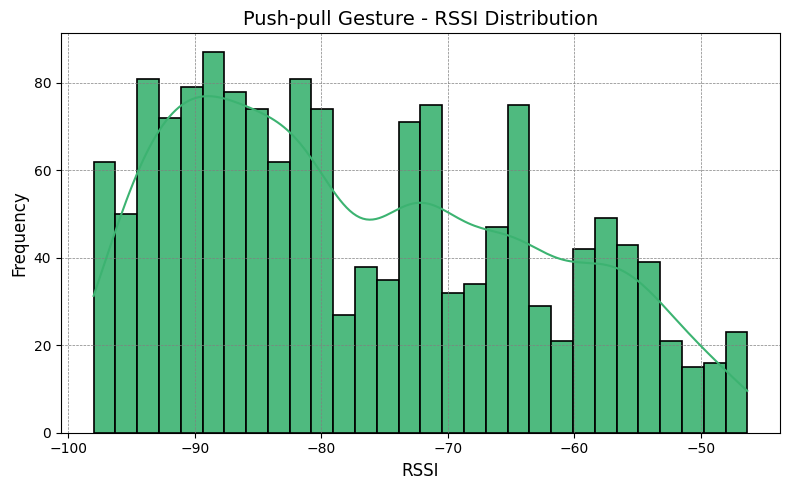

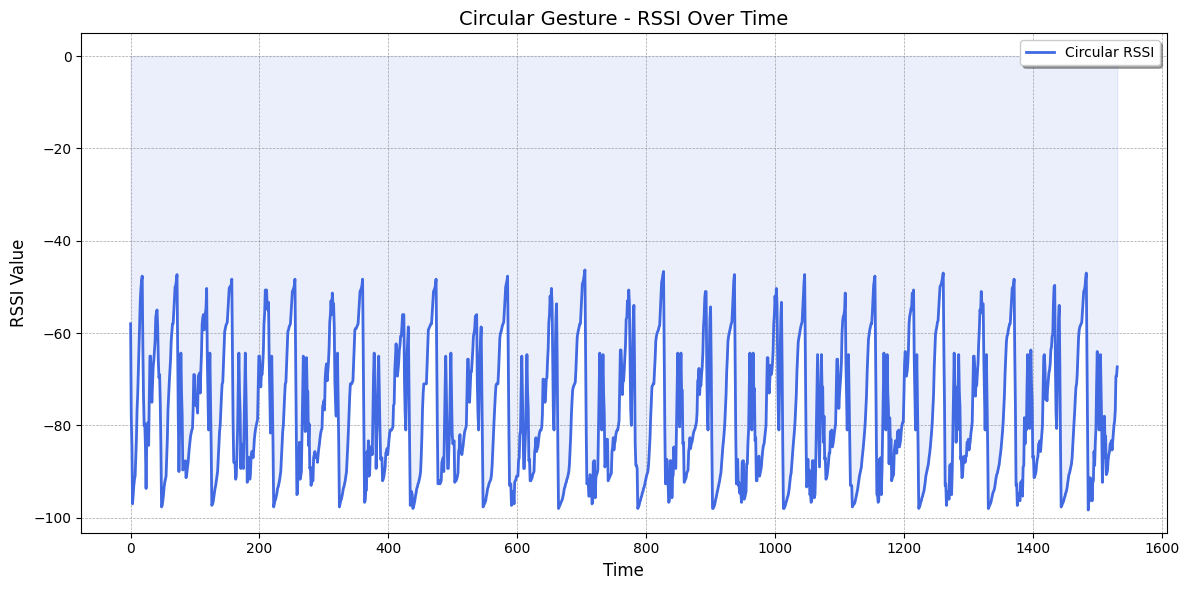

Label 0 count: 60
Label 1 count: 60
Label 2 count: 60
Processed data saved to: ../data/processed/1//gesture_data.npz


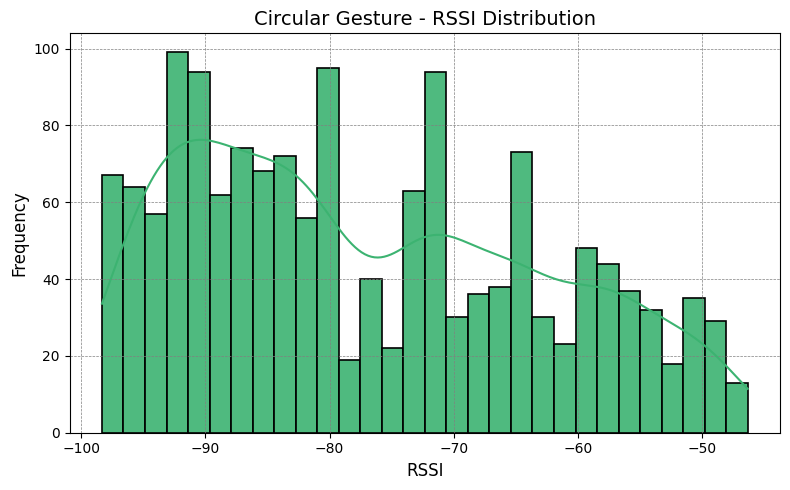

In [74]:
# Run preprocessing on all gesture files
preprocess_gesture_files(input_dir, output_dir)